## Accuracy, F1-score, confusion matrix와 실제 예측 결과가 포함된 수정 버전

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

In [2]:
# 데이터 로드
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [3]:
# 모델 구축
model = models.Sequential()
model.add(layers.Flatten(input_shape = (28, 28)))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0, 2))
model.add(layers.Dense(10, activation = 'softmax'))

C:\Users\gustj\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# 모델 컴파일 및 학습
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(X_train, y_train, epochs = 5)
model.evaluate(X_test, y_test)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8957 - loss: 0.3489
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9745 - loss: 0.0848
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9850 - loss: 0.0487
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9894 - loss: 0.0348
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9919 - loss: 0.0253
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9760 - loss: 0.0821


[0.06989814341068268, 0.9800000190734863]

In [6]:
y_pred = model.predict(X_test)
y_test_class = y_test
y_pred_class = np.argmax(y_pred, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


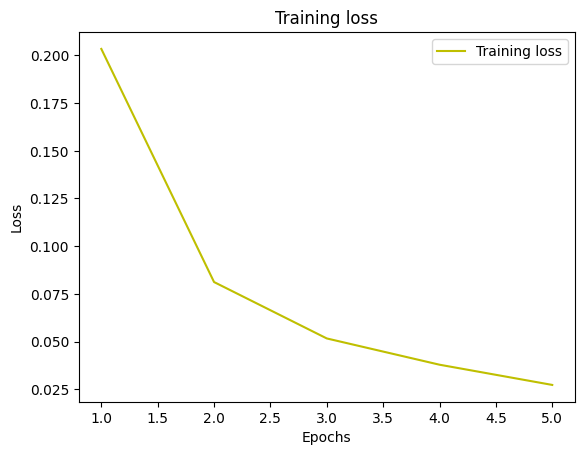

In [7]:
import matplotlib.pyplot as plt

loss =model_history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


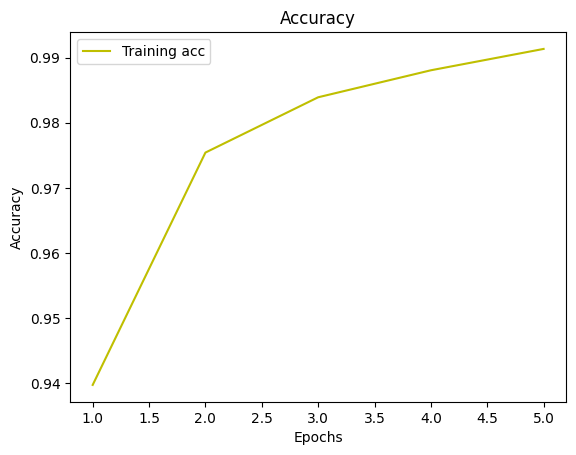

In [8]:
acc =model_history.history['accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.95      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 968    0    0    2    2    0    3    0    4    1]
 [   0 1122    2    3    0    1    1    1    2    3]
 [   6    2 1001    4    1    0    3    3   12    0]
 [   0    0    2  997    0    4    0    1    1    5]
 [   1    0    3    0  960   

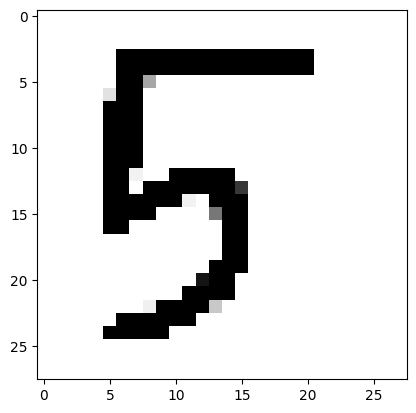

In [10]:
import cv2 as cv

image = cv.imread('C:/AI_Dataset/number5.png', cv.IMREAD_GRAYSCALE) # 숫자 5 손글씨 이미지
image = cv.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28), cmap = 'Greys')
plt.show()

In [12]:
print("image type:", type(image))
print("image shape:", image.shape)
print("image dtype:", image.dtype)

image type: <class 'numpy.ndarray'>
image shape: (1, 784)
image dtype: float32


In [11]:
pred = model.predict(image.reshape(1, 784), batch_size = 1)
print(f"추정된 숫자 = {pred.argmax()}")

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

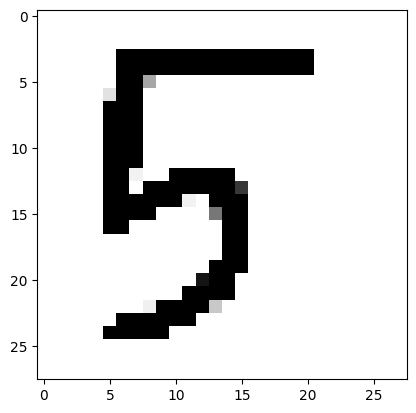

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image and resize to 28x28
image = cv.imread('C:/AI_Dataset/number5.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))

# Invert colors (white digit on black) and normalize to [0, 1]
image = 255 - image
image = image.astype('float32') / 255.0

# Reshape for model prediction (1, 784) if model expects flattened input
image_input = image.reshape(1, 784)

# Visualize the image
plt.imshow(image, cmap='Greys')
plt.show()

# Predict
pred = model.predict(image_input, batch_size=1)
print(f"추정된 숫자 = {pred.argmax()}")